# Perceptron

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

X = breast_cancer.data
Y = breast_cancer.target

print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [3]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1) 
print(Y.mean(), Y_train.mean(), Y_test.mean())
print(X.mean(), X_train.mean(), X_test.mean())

0.6274165202108963 0.626953125 0.631578947368421
61.890712339519624 61.31637960106119 67.04963097269005


## Model 

$$ 
y = 1, \mbox{if} \sum_i w_i x_i >= b
$$
$$ 
y = 0, \mbox{otherwise}
$$

In [5]:
class Perceptron:
    """
    Perceptron class without Epoch
    """
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def model(self, x):
        return (np.dot(self.w, x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            Y_pred = self.model(x)
            Y.append(Y_pred)
        return np.array(Y)
    
    def fit(self, X, Y):
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        for x, y in zip(X, Y):
            Y_pred = self.model(x)
            
            if y == 1 and Y_pred == 0:
                self.w = self.w + x
                self.b = self.b + 1
            
            if y == 0 and Y_pred == 1:
                self.w = self.w - x
                self.b = self.b - 1
        
        plt.plot(self.w)
        plt.show()
        

In [6]:
perceptron = Perceptron()

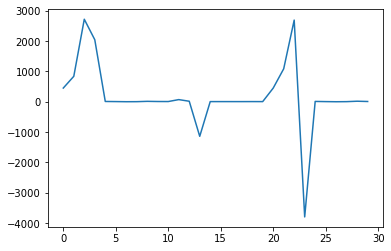

In [7]:
perceptron.fit(X_train, Y_train)

In [8]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.373046875


In [9]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.3684210526315789


## Epoch

In [10]:
class Perceptron:
    """
    Perceptron class with Epoch
    """
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def model(self, x):
        return (np.dot(self.w, x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            Y_pred = self.model(x)
            Y.append(Y_pred)
        return np.array(Y)
    
    def fit(self, X, Y, epoch = 1):

        max_accuracy = 0
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        
        for e in range(epoch):
            for x, y in zip(X, Y):
                Y_pred = self.model(x)

                if y == 1 and Y_pred == 0:
                    self.w = self.w + x
                    self.b = self.b + 1

                if y == 0 and Y_pred == 1:
                    self.w = self.w - x
                    self.b = self.b - 1
                    
            accuracy[e] = accuracy_score(self.predict(X), Y)
            if accuracy[e] > max_accuracy:
                max_accuracy = accuracy[e]
        
        plt.plot(accuracy.values())
        plt.show()
        print(max_accuracy)
        

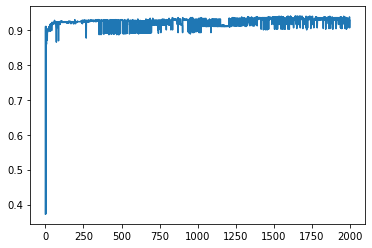

0.939453125


In [11]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train, 2000)

In [12]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.927734375


In [13]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9649122807017544


Problem in above approach is max accuracy is always not used and this issue can be resolved using checkpointing.

## Checkpointing

In [14]:
class Perceptron:
    """
    Perceptron class with Epoch & 
    Checkpoint to maintain w and b of maximum accuracy
    """
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def model(self, x):
        return (np.dot(self.w, x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            Y_pred = self.model(x)
            Y.append(Y_pred)
        return np.array(Y)
    
    def fit(self, X, Y, epoch = 1):

        max_accuracy = 0
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        
        for e in range(epoch):
            for x, y in zip(X, Y):
                Y_pred = self.model(x)

                if y == 1 and Y_pred == 0:
                    self.w = self.w + x
                    self.b = self.b + 1

                if y == 0 and Y_pred == 1:
                    self.w = self.w - x
                    self.b = self.b - 1
                    
            accuracy[e] = accuracy_score(self.predict(X), Y)
            if accuracy[e] > max_accuracy:
                max_accuracy = accuracy[e]
                # store the w and b of max accuracy
                cp_w = self.w
                cp_b = self.b
        
        self.w = cp_w
        self.b = cp_b
        
        plt.plot(accuracy.values())
        plt.show()
        print(max_accuracy)
        

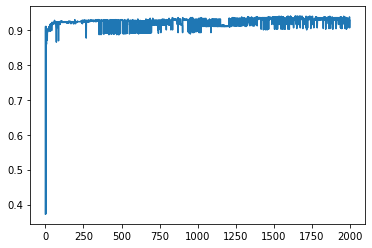

0.939453125


In [15]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train, 2000)

In [16]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.939453125


In [17]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9298245614035088


## Learning Rate

In [37]:
class Perceptron:
    """
    Perceptron class with 
    - Epoch
    - Checkpoint to maintain w and b of maximum accuracy
    - Learning Rate
    
    """
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def model(self, x):
        return (np.dot(self.w, x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            Y_pred = self.model(x)
            Y.append(Y_pred)
        return np.array(Y)
    
    def fit(self, X, Y, epoch = 1, lr = 1):

        max_accuracy = 0
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        wt_matrix = [] # list of all updated weights
        
        accuracy = {}
        
        for e in range(epoch):
            for x, y in zip(X, Y):
                Y_pred = self.model(x)

                if y == 1 and Y_pred == 0:
                    self.w = self.w + (x * lr) # with learning rate lr
                    self.b = self.b + (1 * lr) # with learning rate lr

                if y == 0 and Y_pred == 1:
                    self.w = self.w - (x * lr) # with learning rate lr
                    self.b = self.b - (1 * lr) # with learning rate lr
                    
                    
            accuracy[e] = accuracy_score(self.predict(X), Y)
            wt_matrix.append(self.w)
            if accuracy[e] > max_accuracy:
                max_accuracy = accuracy[e]
                # store the w and b of max accuracy
                cp_w = self.w
                cp_b = self.b
        
        self.w = cp_w
        self.b = cp_b
        
        plt.plot(accuracy.values())
        plt.ylim([0, 1])
        plt.show()
        print(max_accuracy)
        
        return np.array(wt_matrix)
        

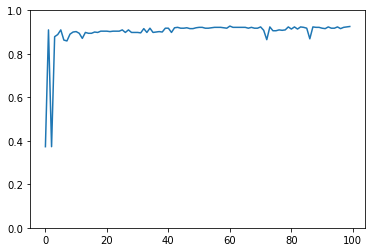

0.927734375


In [38]:
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train, Y_train, 100)

In [39]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.927734375


In [40]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9473684210526315


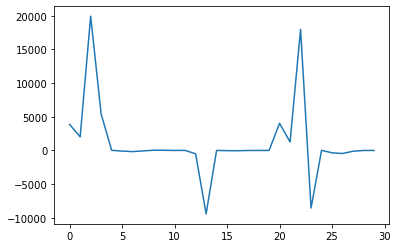

In [41]:
plt.plot(perceptron.w)
plt.show()

## Weight Animation 

In [42]:
from matplotlib import animation, rc
from IPython.display import HTML

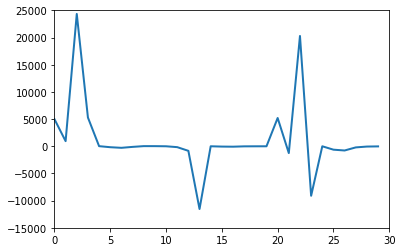

In [45]:
fig, ax = plt.subplots()

ax.set_xlim(0, wt_matrix.shape[1])
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate,
                               frames=100, interval=100, 
                               blit=True)

HTML(anim.to_html5_video())